# Preliminary Results: Elasticity of Tax Revenue and Income Inequality 
Yiyang Chen  
Feb. 25th, 2022

## Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from linearmodels import PanelOLS

In [2]:
CLEANEDDATA_DIR = "../../data/cleaned-data/"

Import the cleaned dataset.

In [3]:
zipcode_all_gini = pd.read_csv(CLEANEDDATA_DIR + "zipcode_all_gini_corrected.csv")
zipcode_all_gini

,year,zipcode,n1,n2,agi,total_tax,agi_class,gini
0,2005,1001.0,8390.0,15363.0,383302,40983,21,0.445356
1,2005,1002.0,10135.0,18684.0,620670,89283,21,0.571086
2,2005,1005.0,2113.0,4503.0,104111,11114,21,0.455962
3,2005,1007.0,6709.0,14373.0,363755,40652,21,0.451793
4,2005,1008.0,617.0,1268.0,31553,3499,21,0.455085
...,...,...,...,...,...,...,...,...
200323,2012,99801.0,12370.0,21900.0,784594,102843,21,0.519315
200324,2012,99824.0,1130.0,1850.0,82023,11723,21,0.535533
200325,2012,99827.0,1360.0,2260.0,62933,7360,21,0.520794
200326,2012,99835.0,4650.0,8140.0,272187,35513,21,0.557577


Find the ZIP Code areas with the highest 1% peusdo Gini coefficient.

In [4]:
gini_rank = pd.DataFrame(zipcode_all_gini.groupby(["zipcode"])["gini"].mean())
gini_rank["std"] = zipcode_all_gini.groupby(["zipcode"])["gini"].std()
gini_rank.reset_index(inplace=True)

In [5]:
gini_rank = gini_rank.sort_values(by="gini", ascending=False)

In [6]:
highest_gini_zipcodes = gini_rank["zipcode"][:int(gini_rank.shape[0]/100)]
highest_gini_zipcodes

7560     30303.0
20066    75220.0
18945    71101.0
22807    90058.0
11336    44115.0
          ...   
7771     30901.0
8155     32328.0
9740     37738.0
1337      6105.0
24077    95912.0
Name: zipcode, Length: 250, dtype: float64

In [7]:
gini_rank["highest_gini"] = gini_rank["zipcode"].isin(highest_gini_zipcodes)
gini_rank.groupby(["highest_gini"])["std"].mean()

highest_gini
False    0.029649
True     0.030091
Name: std, dtype: float64

There is not systematic difference between how peusdo Gini coefficient evolve in two groups.

Apply to the dataset.

In [8]:
zipcode_all_gini["highest_gini"] = zipcode_all_gini["zipcode"].isin(highest_gini_zipcodes)
zipcode_all_gini

,year,zipcode,n1,n2,agi,total_tax,agi_class,gini,highest_gini
0,2005,1001.0,8390.0,15363.0,383302,40983,21,0.445356,False
1,2005,1002.0,10135.0,18684.0,620670,89283,21,0.571086,False
2,2005,1005.0,2113.0,4503.0,104111,11114,21,0.455962,False
3,2005,1007.0,6709.0,14373.0,363755,40652,21,0.451793,False
4,2005,1008.0,617.0,1268.0,31553,3499,21,0.455085,False
...,...,...,...,...,...,...,...,...,...
200323,2012,99801.0,12370.0,21900.0,784594,102843,21,0.519315,False
200324,2012,99824.0,1130.0,1850.0,82023,11723,21,0.535533,False
200325,2012,99827.0,1360.0,2260.0,62933,7360,21,0.520794,False
200326,2012,99835.0,4650.0,8140.0,272187,35513,21,0.557577,False


In [9]:
zipcode_all_gini_chg = zipcode_all_gini.sort_values(["zipcode", "year"])
zipcode_all_gini_chg["total_tax_pct_chg"] = zipcode_all_gini_chg["total_tax"].pct_change() * 100
zipcode_all_gini_chg = zipcode_all_gini_chg[zipcode_all_gini_chg["year"] > 2005]
zipcode_all_gini_chg

,year,zipcode,n1,n2,agi,total_tax,agi_class,gini,highest_gini,total_tax_pct_chg
25041,2006,1001.0,8582.0,14959.0,414324,45101,28,0.444086,False,10.048069
50082,2007,1001.0,9465.0,15850.0,429357,46561,28,0.469808,False,3.237179
75123,2008,1001.0,8596.0,15000.0,429794,46274,28,0.444415,False,-0.616396
100164,2009,1001.0,8565.0,15109.0,426112,43418,21,0.447547,False,-6.171932
125205,2010,1001.0,8608.0,15162.0,436051,45919,21,0.449746,False,5.760284
...,...,...,...,...,...,...,...,...,...,...
100163,2008,99901.0,6413.0,10960.0,346239,46155,28,0.561416,False,6.196217
125204,2009,99901.0,6523.0,11398.0,341608,43564,21,0.573965,False,-5.613693
150245,2010,99901.0,6503.0,11364.0,352103,45489,21,0.572366,False,4.418786
175286,2011,99901.0,6437.0,11413.0,360797,46833,21,0.580845,False,2.954560


In [10]:
print(zipcode_all_gini_chg.describe())

                year        zipcode             n1             n2  \
count  175287.000000  175287.000000  175287.000000  175287.000000   
mean     2009.000000   48244.727367    5462.298157   10875.343700   
std         2.000006   27222.436321    6595.008493   13285.182715   
min      2006.000000    1001.000000      45.000000      92.000000   
25%      2007.000000   26452.000000     811.000050    1634.000050   
50%      2009.000000   47858.000000    2381.000000    4805.000000   
75%      2011.000000   70531.000000    8215.000000   16006.000000   
max      2012.000000   99901.000000   98117.000000  135791.000000   

                agi     total_tax      agi_class           gini  \
count  1.752870e+05  1.752870e+05  175287.000000  168461.000000   
mean   3.199786e+05  4.163684e+04      26.352696       0.575502   
std    5.006723e+05  8.970914e+04     164.911882       0.086014   
min    2.708000e+03  9.700000e+01       6.000000      -0.397511   
25%    3.426750e+04  3.127000e+03      21.0

## Visualization

In this section, I'll provide a visualization for total personal income tax changes in areas with high income inequality (in this case, highest 1% peusdo Gini coefficient) versus that in all other areas. We'll take the mean for each category, and then compare them in a time series plot. 

In [11]:
grouped = zipcode_all_gini.groupby(["highest_gini", "year"]).mean().reset_index()
grouped["total_tax_pct_chg"] = grouped["total_tax"].pct_change() * 100
grouped = grouped[grouped["year"] > 2005]
grouped

,highest_gini,year,zipcode,n1,n2,agi,total_tax,agi_class,gini,total_tax_pct_chg
1,False,2006,48162.306038,5233.019886,10396.513170,300857.727361,40217.923642,49.477754,0.578161,8.867353
2,False,2007,48162.306038,5770.974547,11089.005284,324261.144327,43341.081764,25.586826,0.590510,7.765588
3,False,2008,48162.306038,5371.531483,10660.863862,311002.757977,40331.306563,25.582308,0.564402,-6.944393
4,False,2009,48162.306038,5327.820635,10855.898970,300459.805050,36833.636037,21.000000,0.570337,-8.672346
5,False,2010,48162.306038,5424.984082,10993.297382,317782.756807,40259.867694,21.000000,0.568785,9.301910
6,False,2011,48162.306038,5525.491723,11058.695264,327845.422613,42073.380017,21.000000,0.564178,4.504516
7,False,2012,48162.306038,5513.162035,10984.351579,352895.247953,47127.432939,20.999435,0.576645,12.012472
9,True,2006,56417.956000,6020.404000,11257.868000,371697.228000,61492.056000,28.000000,0.818841,11.983629
10,True,2007,56417.956000,6839.824000,12269.516000,411977.500000,65917.212000,27.428000,0.829440,7.196305
11,True,2008,56417.956000,6269.840000,11739.392000,363062.848000,56665.448000,27.444000,0.808346,-14.035430


Text(0, 0.5, 'Total Income Tax (Percentage Change, %)')

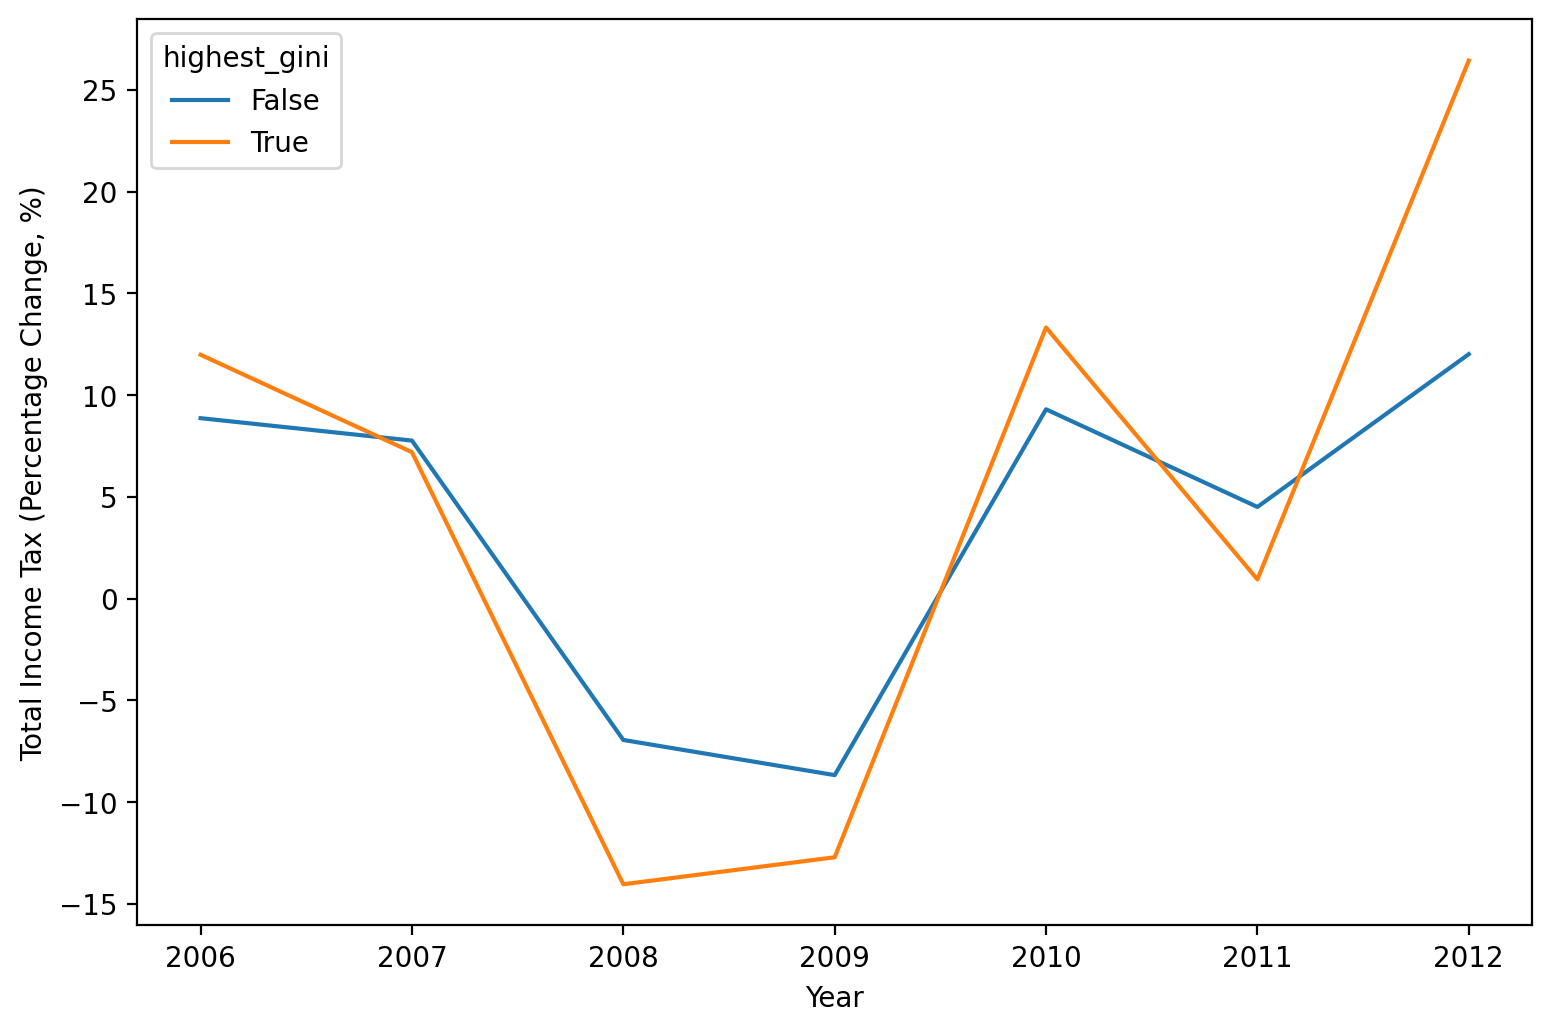

In [12]:
plt.figure(figsize=(9, 6), dpi=200)
sns.lineplot(data=grouped, x="year", y="total_tax_pct_chg", hue="highest_gini")
plt.xlabel("Year")
plt.ylabel("Total Income Tax (Percentage Change, %)")
# plt.title("Total Personal Income Tax in Highest 1% Gini Coefficient ZIP Code Areas vs All Others");

## Regression

In [13]:
zipcode_all_gini.set_index(["year", "zipcode"], inplace=True)
zipcode_all_gini_chg.set_index(["year", "zipcode"], inplace=True)

In [14]:
coincident = pd.read_csv("../../data/raw-data/coincident/coincident-revised.csv")
coincident["year"] = coincident.index // 12 + 1979
coincident_averaged = coincident.groupby(["year"])["US"].mean().reset_index()
coincident_averaged.head()

,year,US
0,1979,45.932500
1,1980,46.585000
2,1981,47.434167
3,1982,47.160000
4,1983,47.964167


In [15]:
coincident_relevant = coincident_averaged[(coincident_averaged["year"] >= 2005) & (coincident_averaged["year"] <= 2012)].copy()
coincident_relevant["coincident_pct_chg"] = coincident_relevant["US"].pct_change() * 100
coincident_relevant.dropna(inplace=True)
coincident_relevant.set_index("year", inplace=True)
coincident_relevant

,US,coincident_pct_chg
year,,
2006,97.531667,3.198102
2007,100.001667,2.532511
2008,100.692500,0.690822
2009,97.512500,-3.158130
2010,97.930833,0.429005
2011,100.564167,2.688973
2012,103.739167,3.157188


In [16]:
rdgp = pd.read_csv(CLEANEDDATA_DIR + "GDPC1.csv")
rdgp_chg = rdgp.copy()
rdgp_chg["rgdp_pct_chg"] = rdgp["GDPC1"].pct_change() * 100
rdgp_chg.dropna(inplace=True)
rdgp_chg.set_index("year", inplace=True)
rdgp_chg

,GDPC1,rgdp_pct_chg
year,,
2006,15315.94325,2.782812
2007,15623.87150,2.010508
2008,15642.96200,0.122188
2009,15236.26225,-2.599890
2010,15648.99100,2.708858
2011,15891.53400,1.549895
2012,16253.97000,2.280686


In [17]:
zipcode_all_gini_chg = zipcode_all_gini_chg.merge(rdgp_chg, left_index=True, right_index=True)
zipcode_all_gini_chg["rgdp_pct_chg*highest_gini"] = zipcode_all_gini_chg["highest_gini"] * zipcode_all_gini_chg["rgdp_pct_chg"]
zipcode_all_gini_chg

,,n1,n2,agi,total_tax,agi_class,gini,highest_gini,total_tax_pct_chg,GDPC1,rgdp_pct_chg,rgdp_pct_chg*highest_gini
year,zipcode,,,,,,,,,,,
2006,1001.0,8582.0,14959.0,414324,45101,28,0.444086,False,10.048069,15315.94325,2.782812,0.0
2007,1001.0,9465.0,15850.0,429357,46561,28,0.469808,False,3.237179,15623.87150,2.010508,0.0
2008,1001.0,8596.0,15000.0,429794,46274,28,0.444415,False,-0.616396,15642.96200,0.122188,0.0
2009,1001.0,8565.0,15109.0,426112,43418,21,0.447547,False,-6.171932,15236.26225,-2.599890,-0.0
2010,1001.0,8608.0,15162.0,436051,45919,21,0.449746,False,5.760284,15648.99100,2.708858,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2008,99901.0,6413.0,10960.0,346239,46155,28,0.561416,False,6.196217,15642.96200,0.122188,0.0
2009,99901.0,6523.0,11398.0,341608,43564,21,0.573965,False,-5.613693,15236.26225,-2.599890,-0.0
2010,99901.0,6503.0,11364.0,352103,45489,21,0.572366,False,4.418786,15648.99100,2.708858,0.0


In [18]:
exog = sm.add_constant(zipcode_all_gini_chg[["rgdp_pct_chg", "rgdp_pct_chg*highest_gini"]])
model = PanelOLS(zipcode_all_gini_chg.total_tax_pct_chg, exog)
res = model.fit(cov_type="robust")
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:      total_tax_pct_chg   R-squared:                        0.0168
Estimator:                   PanelOLS   R-squared (Between):              0.8387
No. Observations:              175287   R-squared (Within):            9.164e-05
Date:                Mon, Feb 28 2022   R-squared (Overall):              0.0168
Time:                        13:32:06   Log-likelihood                  -8.8e+05
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1500.6
Entities:                           7   P-value                           0.0000
Avg Obs:                    2.504e+04   Distribution:                F(2,175284)
Min Obs:                    2.504e+04                                           
Max Obs:                    2.504e+04   F-statistic (robust):             3252.0
                            